In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [82]:
# Data Preparation
df.columns = df.columns.str.lower().str.replace(' ', '_')
base = ['ram','storage','screen','final_price']
df = df[base]

<Axes: xlabel='final_price', ylabel='Count'>

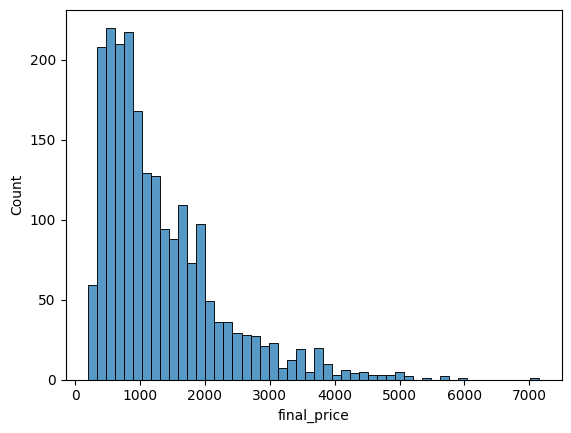

In [83]:
# EDA
sns.histplot(df.final_price, bins=50)

In [84]:
# Question 1
for i in df.columns:
    if df[i].isna().sum():
        print(i)
    else:
        pass

screen


In [85]:
# Question 2
print(df['ram'].median())

16.0


In [147]:
# More Data Preparation
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.final_price
y_val = df_val.final_price
y_test = df_test.final_price
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [87]:
# NA = 0
X_train_0 = df_train.fillna(value=0).values
# NA = mean
df_train['screen'] = df_train['screen'].fillna(value=int(df_train['screen'].mean()))
X_train_mean = df_train.values

In [88]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

def train_lr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [89]:
# NA = 0
w0_0, w_0 = train_lr(X_train_0, y_train)
y_pred_0 = w0_0 + X_train_0.dot(w_0)
# NA = mean
w0_mean, w_mean = train_lr(X_train_mean, y_train)
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

<Axes: xlabel='final_price', ylabel='Count'>

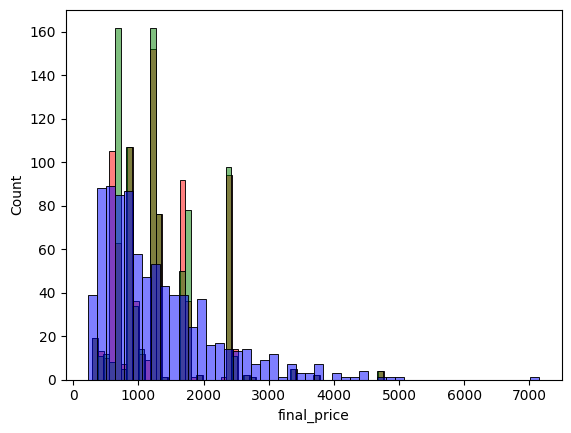

In [90]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='green', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [91]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [100]:
X_val_0 = df_val.fillna(0).values
y_pred_0 = w0_0 + X_val_0.dot(w_0)
rmse(y_val, y_pred_0)

np.float64(594.4671180036487)

In [96]:
df_val['screen'] = df_val['screen'].fillna(value=int(df_val['screen'].mean()))
X_val_mean = df_val.values
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse(y_val, y_pred_0)

np.float64(594.4671180036487)

In [61]:
def prepare_X(df):
    df = df.copy()
    features = base
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [148]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
w0, w = train_linear_regression_reg(X_train, y_train)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(592.5580380450492)

In [151]:
# Question 4
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

rs = [0, 0.001, 0.01, 0.1, 1, 5, 10, 100]

for r in rs:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,3))


0 569.9120149802563 584.388
0.001 569.81435421946 584.388
0.01 568.9369133960781 584.392
0.1 560.3090856994861 584.433
1 486.54368897793586 584.811
5 307.0824719706435 585.945
10 210.32529841149898 586.682
100 32.15369085241151 588.316


In [149]:
# Question 5
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
acc = []

for s in seeds:
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[n_train:]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.final_price
    y_val = df_val.final_price
    y_test = df_test.final_price
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    X_train = prepare_X(df_train)
    w0, w = train_lr(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    acc.append(rmse(y_val, y_pred))
scores = np.array(acc)
scores.std()

np.float64(29.88435334603985)